# Stackoverflow Survey Data Analysis

An analysis of diversity in language communities based on stack overflow survey data.

Import required libs

In [296]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.style as style
import matplotlib.cm as mplcm
import matplotlib.colors as colors
import numpy as np
import math


style.use('seaborn')
# style.available

Load Stackoverflow data

In [297]:
data = pd.read_csv('data/2019/survey_results_public.csv')


## Cleaning The Data

In [298]:
idx = 0
for row in data['Ethnicity']:
    if not isinstance(row, str):
        data.loc[idx, 'Ethnicity']='Not Specified'
    else:
        split_count = len(row.split(';'))
        if split_count > 2:
            data.loc[idx, 'Ethnicity']='Multiracial'
        elif split_count == 2:
             data.loc[idx, 'Ethnicity']='Biracial'
    idx +=1


# data.Ethnicity

In [299]:
idx = 0;
for row in data['Gender']:
    if not isinstance(row, str):
        data.loc[idx, 'Gender']='Not Specified'
    idx += 1


Lets create some functions to help us count usages of a language. We should output how many stack overflow respondants use each language in the list.

In [300]:
langs = ['Python','JavaScript','Java','C#','Scala','Swift','Objective-C','Go','Rust','C++']
language_users = []

def count_for_lang(dataFrame, lang):
    count = 0
    for ww in dataFrame.LanguageWorkedWith:
        # print(ww)
        if lang in str(ww):
            count += 1
    return count

def handle_pair(pair):
    (total, chunk) = pair
    return (chunk/total) * 100

def get_percs(totals, chunks):
    return list(map(handle_pair, zip(totals, chunks)))

for lang in langs:
   count = count_for_lang(data, lang)
   language_users.append(count)

language_users

[36443, 59219, 70113, 27097, 3309, 5744, 4191, 7201, 2794, 20524]

## Gender/Sex
The survey has a column called gender but it seems to refert to sex. 

The following is a distribution in percentage in each of the languages.

In [301]:
gender_groups = []

for g in data.Gender.unique():
    if isinstance(g, str):
        if not ';' in g and not ',' in g: #This data is a bit dirty
            gender_groups.append(g)

gender_groups

['Man', 'Not Specified', 'Woman']

In [302]:
data_by_group = []

for group_name in gender_groups:
    data_by_group.append(data[data.Gender == group_name])


In [303]:
count_for_group = []

for g in data_by_group:
    group_langs = []
    for lang in langs:
        group_langs.append(count_for_lang(g, lang))
    count_for_group.append(group_langs)

count_for_group

[[32308, 52465, 62017, 24442, 2959, 5106, 3701, 6492, 2482, 18210],
 [1276, 1911, 2347, 868, 98, 220, 159, 273, 130, 867],
 [2314, 4088, 4875, 1495, 193, 342, 271, 307, 106, 1152]]

In [304]:
percentage_for_group = []

for c in count_for_group:
    p = get_percs(language_users, c)
    percentage_for_group.append(p)

percentage_for_group

[[88.65351370633591,
  88.59487664432024,
  88.4529259909004,
  90.201867365391,
  89.42278634028408,
  88.89275766016713,
  88.30827964686232,
  90.15414525760312,
  88.83321403006443,
  88.72539465991035],
 [3.501358285541805,
  3.2270048464175347,
  3.3474533966596782,
  3.2033066391113403,
  2.9616198247204593,
  3.83008356545961,
  3.7938439513242663,
  3.791140119427857,
  4.652827487473156,
  4.224322744104463],
 [6.349641906538979,
  6.903189854607474,
  6.953061486457576,
  5.517215927962505,
  5.832577818071925,
  5.954038997214485,
  6.466237174898593,
  4.263296764338286,
  3.7938439513242663,
  5.612940947183785]]

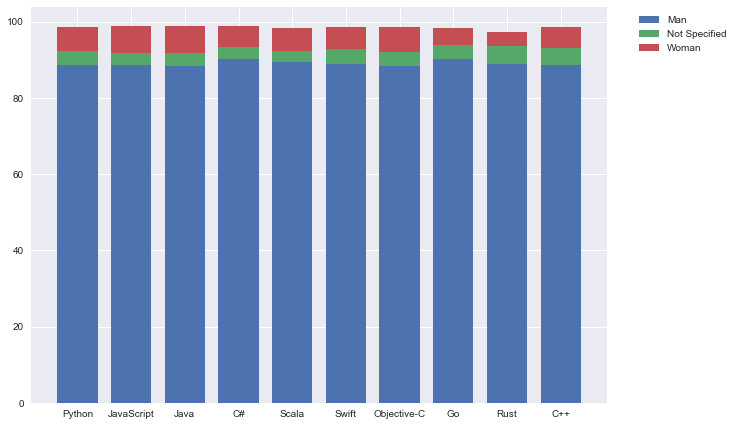

In [305]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

width = 0.75

totals = []
for idx, group in enumerate(percentage_for_group):
    if idx == 0:
        ax.bar(langs, group, width)
        totals = group
    else:
        ax.bar(langs, group, width, bottom=totals)
        for i in range(len(totals)):
            totals[i] = totals[i] + group[i]


ax.legend(labels=gender_groups, bbox_to_anchor=(1.04, 1))
plt.show()

## Ethnic Groups

In [307]:
ethnic_groups = []

for g in data.Ethnicity.unique():
    if isinstance(g, str):
        if not ';' in g and not ',' in g: #This data is a bit dirty
            ethnic_groups.append(g)

ethnic_groups

['Not Specified',
 'White or of European descent',
 'Biracial',
 'East Asian',
 'Multiracial',
 'Black or of African descent',
 'Hispanic or Latino/Latina',
 'Middle Eastern',
 'South Asian']

In [308]:
data_by_group = []

for group_name in ethnic_groups:
    data_by_group.append(data[data.Ethnicity == group_name])


In [309]:
count_for_group = []

for g in data_by_group:
    group_langs = []
    for lang in langs:
        group_langs.append(count_for_lang(g, lang))
    count_for_group.append(group_langs)

count_for_group

[[4334, 7535, 9222, 3197, 361, 789, 637, 746, 279, 3159],
 [21540, 34431, 40108, 16946, 2007, 3225, 2286, 4640, 1984, 11273],
 [1615, 2535, 2989, 1101, 163, 231, 179, 336, 114, 786],
 [1535, 2234, 2718, 876, 140, 266, 200, 293, 82, 965],
 [882, 1267, 1451, 543, 87, 143, 99, 186, 99, 468],
 [779, 1519, 1774, 501, 50, 109, 56, 119, 32, 363],
 [1347, 2484, 2885, 1102, 131, 250, 166, 237, 66, 599],
 [982, 1654, 2052, 889, 70, 187, 122, 160, 34, 642],
 [3385, 5479, 6821, 1900, 294, 536, 439, 477, 99, 2242]]

In [310]:
percentage_for_group = []

for c in count_for_group:
    p = get_percs(language_users, c)
    percentage_for_group.append(p)



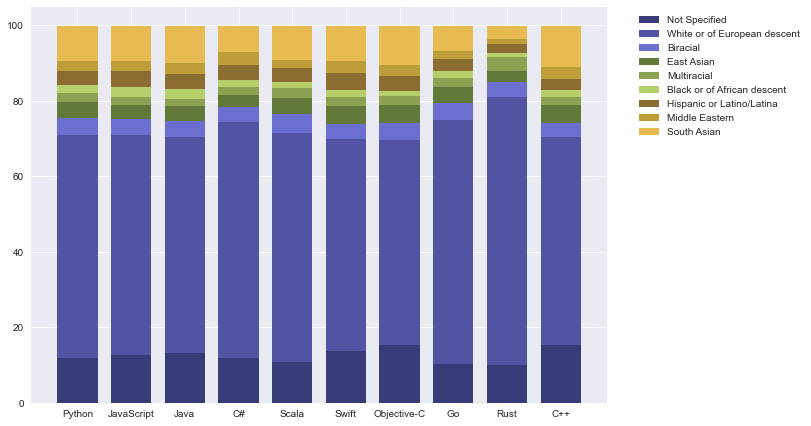

In [311]:
# Draw bar
NUM_COLORS = 16

cm = plt.get_cmap('tab20b')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

width = 0.75

totals = []
for idx, group in enumerate(percentage_for_group):
    if idx == 0:
        ax.bar(langs, group, width, color=scalarMap.to_rgba(idx))
        totals = group
    else:
        ax.bar(langs, group, width, bottom=totals, color=scalarMap.to_rgba(idx))
        for i in range(len(totals)):
            totals[i] = totals[i] + group[i]


ax.legend(labels=ethnic_groups, bbox_to_anchor=(1.04, 1))
plt.show()